In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
save_dir = '/content/drive/MyDrive/colab_saves'
os.makedirs(save_dir, exist_ok=True)



Mounted at /content/drive


In [2]:

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
!pip install -q --upgrade transformers sentence-transformers accelerate
!pip install mteb
!pip install -U --no-cache-dir --force-reinstall "datasets>=2.19.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 126.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 109.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 291.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 262.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 280.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 176.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 304.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 343.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.4/515.4 kB 362.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 338.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 295.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 279.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 309.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install mteb
import time
import requests
import pandas as pd
from datetime import datetime
import calendar
from sentence_transformers import SentenceTransformer, util
import numpy as np
from sentence_transformers.models import Transformer, Pooling
from mteb import get_tasks, MTEB
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
import scipy.stats as st
import numpy as np, time, torch
from datasets  import load_dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,f1_score, recall_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV , StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree        import DecisionTreeRegressor
from sklearn.metrics     import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree        import DecisionTreeRegressor
from sklearn.metrics     import mean_squared_error, mean_absolute_error, r2_score
import yfinance as yf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.0/288.0 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import os
import time
import requests
import pandas as pd
from datetime import datetime
import calendar
from sentence_transformers import SentenceTransformer, util
import numpy as np
from sentence_transformers.models import Transformer, Pooling
from mteb import get_tasks, MTEB
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
import scipy.stats as st
import numpy as np, time, torch
from datasets  import load_dataset

In [8]:
# Import the dataset from google drive, which I have downloaded before. We don't
# have to rerun the fetch_symbol_news function below
import pickle
drive.mount('/content/drive', force_remount=True)

path = '/content/drive/MyDrive/colab_saves/company_dfs.pkl'

!ls -lh "{path}"
with open(path, 'rb') as f:
    company_dfs = pickle.load(f)
print(type(company_dfs))
print(company_dfs.keys())


Mounted at /content/drive
-rw------- 1 root root 2.4M Jun 29 14:49 /content/drive/MyDrive/colab_saves/company_dfs.pkl
<class 'dict'>
dict_keys(['JPM', 'BAC', 'WFC', 'RY'])


In [ ]:
import os, time, requests, pandas as pd
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

API_KEY = os.getenv("RAPIDAPI_KEY") or "ad973560c8msh96909b7fb3cc3fdp1c1065jsn5a49e6b93474"
HEADERS = {
    "X-RapidAPI-Key":  API_KEY,
    "X-RapidAPI-Host": "seeking-alpha.p.rapidapi.com",
}

session = requests.Session()
retry_cfg = Retry(
    total=5,
    backoff_factor=1,
    status_forcelist=[429, 500, 502, 503, 504],
    allowed_methods=["GET"],
)
session.mount("https://", HTTPAdapter(max_retries=retry_cfg))


def _respect_rate_limit(resp):
    """Sleep if remaining-requests header is low."""
    left = resp.headers.get("X-RateLimit-Requests-Remaining")
    reset = resp.headers.get("X-RateLimit-Requests-Reset")
    if left is not None and reset is not None:
        left, reset = int(left), int(reset)
        if left < 2:
            sleep_s = max(reset - int(time.time()), 1)
            print(f"[rate-limit] only {left} calls left → sleeping {sleep_s}s")
            time.sleep(sleep_s)

# extracting the news with particular symbols

def fetch_symbol_news(symbol: str,
                      max_items: int = 200,
                      page_size: int = 40,
                      since: int = 0,
                      until: int = 0) -> pd.DataFrame:
    url   = "https://seeking-alpha.p.rapidapi.com/news/v2/list-by-symbol"
    items = []
    page  = 1

    while len(items) < max_items:
        p = {"id": symbol, "size": page_size, "number": page}
        if since: p["since"] = since
        if until: p["until"] = until

        r = session.get(url, headers=HEADERS, params=p, timeout=20)
        r.raise_for_status()
        batch = r.json().get("data", [])
        if not batch:
            break

        items.extend(batch)
        if len(batch) < page_size:
            break

        page += 1
        time.sleep(0.25 + 0.25 * os.urandom(1)[0] / 255)

    if not items:
        return pd.DataFrame(columns=["title", "publishOn", "symbol"])

    df = pd.json_normalize(items[:max_items])

    for c in ["attributes.title", "attributes.headline", "attributes.teaser"]:
        if c in df.columns:
            df = df.rename(columns={c: "title"})
            break
    if "title" not in df.columns:
        df["title"] = ""

    if "publishOn" in df.columns:
        df["publishOn"] = pd.to_datetime(df["publishOn"], utc=True)
    elif "publishedAt" in df.columns:
        df["publishOn"] = pd.to_datetime(df["publishedAt"], utc=True)

    df["symbol"] = symbol
    return df



In [ ]:
# collecting the news relating to JPM, BAC, WFC and RY
df_jpm = fetch_symbol_news("JPM", max_items=200, since=0, until=0)
df_bac = fetch_symbol_news("BAC", max_items=200, since=0, until=0)
df_wfc = fetch_symbol_news("WFC", max_items=200, since=0, until=0)
df_ry  = fetch_symbol_news("RY",  max_items=200, since=0, until=0)
company_dfs = {
    "JPM": df_jpm,
    "BAC": df_bac,
    "WFC": df_wfc,
    "RY":  df_ry,}



In [ ]:
# try 4 LLM transformers to do embedding
transformer_1 = Transformer("sentence-transformers/paraphrase-MiniLM-L6-v2",
                          max_seq_length=128)

transformer_2 = Transformer("sentence-transformers/all-mpnet-base-v2",
    max_seq_length=128)

transformer_3 = Transformer("sentence-transformers/gtr-t5-large",
                          max_seq_length=128)

transformer_4 = Transformer("intfloat/e5-large-v2",
    max_seq_length=128)

transformer_5 = Transformer("sentence-transformers/all-MiniLM-L12-v2")

transformer_6 = Transformer("sentence-transformers/stsb-roberta-large")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [9]:
# testing on the stsb-roberta-large embedding results
backbones = [
    "sentence-transformers/paraphrase-MiniLM-L6-v2",
    "sentence-transformers/all-mpnet-base-v2",
    "sentence-transformers/gtr-t5-large",
    "intfloat/e5-large-v2",
    "sentence-transformers/all-MiniLM-L12-v2",
    "sentence-transformers/stsb-roberta-large"]

def quick_sts(model_name: str) -> float:
    model = SentenceTransformer(model_name, device="cuda")
    sts   = load_dataset("stsb_multi_mt", name="en", split="dev[:1500]")
    emb1  = model.encode(sts["sentence1"], batch_size=64, convert_to_numpy=True)
    emb2  = model.encode(sts["sentence2"], batch_size=64, convert_to_numpy=True)
    cos   = util.cos_sim(emb1, emb2).diagonal()
    return st.spearmanr(cos, sts["similarity_score"]).correlation

def quick_banking(model_name: str,
                  n_train: int = 1000,
                  n_test: int  = 2000) -> float:
    ds   = load_dataset("PolyAI/banking77", split="train").shuffle(seed=42)
    text = ds["text"][:n_train + n_test]
    y    = ds["label"][:n_train + n_test]

    X_tr_raw, X_te_raw, y_tr, y_te = train_test_split(
        text, y, train_size=n_train, stratify=y, random_state=42)

    model = SentenceTransformer(model_name, device="cuda")
    X_tr  = model.encode(X_tr_raw, convert_to_numpy=True)
    X_te  = model.encode(X_te_raw, convert_to_numpy=True)

    clf   = LogisticRegression(max_iter=1000).fit(X_tr, y_tr)
    return accuracy_score(y_te, clf.predict(X_te))

def quick_speed(model_name: str,
                n_sent: int = 2048,
                sent_len: int = 16) -> tuple[float, int]:
    dummy  = ["hello world"] * n_sent
    model  = SentenceTransformer(model_name, device="cuda")
    t0     = time.time()
    _      = model.encode(dummy, batch_size=128, convert_to_numpy=True)
    sec    = time.time() - t0
    dim    = model.get_sentence_embedding_dimension()
    return n_sent / sec, dim

for mdl in backbones:
    short = mdl.split('/')[-1]
    sts_rho        = quick_sts(mdl)
    banking_acc    = quick_banking(mdl)
    toks_per_sec, d = quick_speed(mdl)

    print(f"{short:30s} | STS ρ  {sts_rho: .4f}"
          f" | Banking acc {banking_acc: .3f}"
          f" | {int(toks_per_sec):5d} sents/s"
          f" | {d:4d} dims")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/470k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/108k [00:00<?, ?B/s]

dev-00000-of-00001.parquet:   0%|          | 0.00/142k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5749 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1379 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/1500 [00:00<?, ? examples/s]

README.md: 0.00B [00:00, ?B/s]

banking77.py: 0.00B [00:00, ?B/s]

dataset_infos.json: 0.00B [00:00, ?B/s]

The repository for PolyAI/banking77 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/PolyAI/banking77.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/10003 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3080 [00:00<?, ? examples/s]

paraphrase-MiniLM-L6-v2        | STS ρ   0.8705 | Banking acc  0.822 | 14325 sents/s |  384 dims


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

all-mpnet-base-v2              | STS ρ   0.8811 | Banking acc  0.803 |  8454 sents/s |  768 dims


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/3.15M [00:00<?, ?B/s]

2_Dense/pytorch_model.bin:   0%|          | 0.00/3.15M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

gtr-t5-large                   | STS ρ   0.8332 | Banking acc  0.767 |  3743 sents/s |  768 dims


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

e5-large-v2                    | STS ρ   0.8888 | Banking acc  0.591 |  2762 sents/s | 1024 dims


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

all-MiniLM-L12-v2              | STS ρ   0.8750 | Banking acc  0.795 |  9763 sents/s |  384 dims


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/674 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

stsb-roberta-large             | STS ρ   0.8785 | Banking acc  0.830 |  2753 sents/s | 1024 dims


In the previous example, I tested the embedding performance of 6 sentence‐embedding backbones by measuring (1) spearman's rho comparing to human scoring (2) classification accuracy on a simple logistic classifier (3) number of embeddings that could be proceeded per second. Considering the task onward, I choose (2) as main criterion for model selection because I aim to classify the stock price movement in the next step. Overall, the embedding of LLM paraphrase-MiniLM-L6-v2 and stsb-roberta-large has highest classification accuracy, which I choose as the optimal models in the next step.

In [ ]:
backbone     = "sentence-transformers/stsb-roberta-large"
transformer  = Transformer(backbone, max_seq_length=128)
dim          = transformer.get_word_embedding_dimension()

mean_pool    = Pooling(dim, pooling_mode_mean_tokens=True)
max_pool     = Pooling(dim, pooling_mode_mean_tokens=False, pooling_mode_max_tokens=True)
maxmean_pool = Pooling(dim, pooling_mode_mean_tokens=True,  pooling_mode_max_tokens=True)
pseudo_pool  = Pooling(dim, pooling_mode_mean_tokens=False, pooling_mode_max_tokens=False,
                       pooling_mode_cls_token=True)

model_mean    = SentenceTransformer(modules=[transformer, mean_pool],    device="cuda")
model_max     = SentenceTransformer(modules=[transformer, max_pool],     device="cuda")
model_maxmean = SentenceTransformer(modules=[transformer, maxmean_pool], device="cuda")
model_pseudo  = SentenceTransformer(modules=[transformer, pseudo_pool],  device="cuda")

variants = {
    "mean":    model_mean,
    "max":     model_max,
    "maxmean": model_maxmean,
    "pseudo":  model_pseudo,
}

buffers = {name: [] for name in variants}

for sym, df in company_dfs.items():
    if "attributes.publishOn" in df.columns:
        df = df.rename(columns={"attributes.publishOn": "publishOn"})

    texts = df["title"].fillna("").tolist()

    for name, model in variants.items():
        emb = model.encode(texts, batch_size=32, convert_to_numpy=True)
        print(f"{name:7s} → {emb.shape[0]} samples × {emb.shape[1]}-dim embeddings")
        df[f"emb_{name}"] = list(emb)


        buffers[name].append(df.assign(symbol=sym))

X_store = {}

for name, parts in buffers.items():
    big_df = pd.concat(parts, ignore_index=True)
    X = np.vstack(big_df[f"emb_{name}"].values)

    X_store[name] = X
    globals()[f"X_{name}"] = X

    print(f"{name:7s} → X_{name}.shape = {X.shape}")

config.json:   0%|          | 0.00/674 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

mean    → 200 samples × 1024-dim embeddings
max     → 200 samples × 1024-dim embeddings
maxmean → 200 samples × 2048-dim embeddings
pseudo  → 200 samples × 1024-dim embeddings
mean    → 200 samples × 1024-dim embeddings
max     → 200 samples × 1024-dim embeddings
maxmean → 200 samples × 2048-dim embeddings
pseudo  → 200 samples × 1024-dim embeddings
mean    → 200 samples × 1024-dim embeddings
max     → 200 samples × 1024-dim embeddings
maxmean → 200 samples × 2048-dim embeddings
pseudo  → 200 samples × 1024-dim embeddings
mean    → 200 samples × 1024-dim embeddings
max     → 200 samples × 1024-dim embeddings
maxmean → 200 samples × 2048-dim embeddings
pseudo  → 200 samples × 1024-dim embeddings
mean    → X_mean.shape = (800, 1024)
max     → X_max.shape = (800, 1024)
maxmean → X_maxmean.shape = (800, 2048)
pseudo  → X_pseudo.shape = (800, 1024)


In [ ]:


def label_news_df(df: pd.DataFrame, symbol: str) -> pd.DataFrame:
    df = df.copy()
    if "attributes.publishOn" in df.columns:
        df = df.rename(columns={"attributes.publishOn": "publishOn"})


    df["publishOn"] = (
        pd.to_datetime(df["publishOn"], utc=True, errors="coerce")
          .dt.tz_localize(None)
    )
    df = df.dropna(subset=["publishOn"])

    # 1) build price window
    earliest = df["publishOn"].dt.date.min()
    latest   = df["publishOn"].dt.date.max()
    start_dt = (pd.Timestamp(earliest) - pd.Timedelta(days=7)).strftime("%Y-%m-%d")
    end_dt   = (pd.Timestamp(latest)   + pd.Timedelta(days=7)).strftime("%Y-%m-%d")

    px = yf.download(symbol, start=start_dt, end=end_dt, interval="1d")

    # extract the Close price
    closes = px["Close"]
    if isinstance(closes, pd.DataFrame):
        closes = closes.squeeze()

    # normalise to midnight dates
    closes.index = closes.index.tz_localize(None).normalize()
    trading_dates = closes.index

    ret_vals, labels = [], []
    for ts in df["publishOn"]:
        pub = pd.to_datetime(ts).tz_localize(None).normalize()

        prev_days = trading_dates[trading_dates < pub]
        next_days = trading_dates[trading_dates > pub]
        if prev_days.empty or next_days.empty:
            ret_vals.append(np.nan)
            labels.append(np.nan)
            continue

        d0, d1 = prev_days.max(), next_days.min()
        p0, p1 = closes.at[d0], closes.at[d1]

        if pd.isna(p0) or pd.isna(p1) or p0 == 0:
            ret_vals.append(np.nan)
            labels.append(np.nan)
            continue

        r = p1 / p0 - 1
        ret_vals.append(r)
        labels.append(int(r > 0))

    df["return_1d"] = ret_vals
    df["label"]     = labels
    df = df.dropna(subset=["label"]).reset_index(drop=True)
    return df



In [ ]:

labeled_dfs = {
    sym: label_news_df(df, sym)
    for sym, df in company_dfs.items()
}

buffers = {name: [] for name in variants}

for sym, df in labeled_dfs.items():
    texts = df["title"].fillna("").tolist()
    for name, model in variants.items():
        df[f"emb_{name}"] = list(
            model.encode(texts, batch_size=32, convert_to_numpy=True)
        )
        buffers[name].append(df.assign(symbol=sym))

X_store = {}
y_vec   = None

for name, parts in buffers.items():
    big_df = pd.concat(parts, ignore_index=True)
    X = np.vstack(big_df[f"emb_{name}"].values)
    X_store[name] = X
    globals()[f"X_{name}"] = X

    if y_vec is None:
        y_vec = big_df["label"].astype(int).values

    print(f"{name:7s} → X_{name}.shape = {X.shape}")



/tmp/ipython-input-13-1800569411.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  px = yf.download(symbol, start=start_dt, end=end_dt, interval="1d")
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-13-1800569411.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  px = yf.download(symbol, start=start_dt, end=end_dt, interval="1d")
[*********************100%***********************]  1 of 1 completed


mean    → X_mean.shape = (788, 384)
max     → X_max.shape = (788, 384)
maxmean → X_maxmean.shape = (788, 768)
pseudo  → X_pseudo.shape = (788, 384)


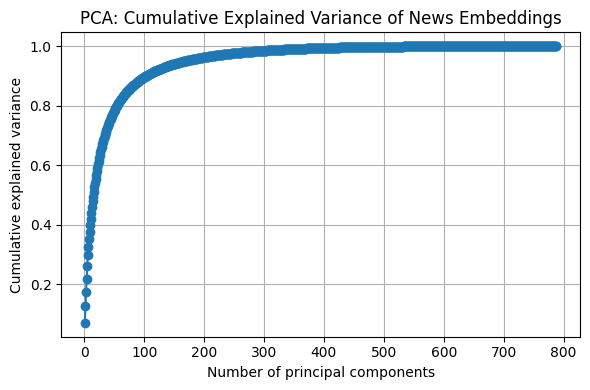

In [ ]:

pca = PCA(n_components=788)
pca.fit(X_mean)
explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(cumulative)+1), cumulative, marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA: Cumulative Explained Variance of News Embeddings")
plt.grid(True)
plt.tight_layout()
plt.show()

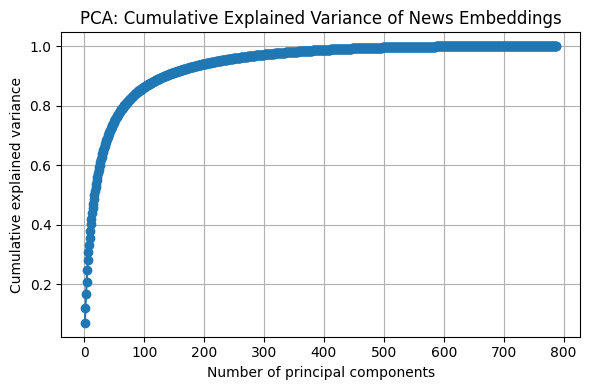

In [ ]:
pca = PCA(n_components=788)
pca.fit(X_max)
explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(cumulative)+1), cumulative, marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA: Cumulative Explained Variance of News Embeddings")
plt.grid(True)
plt.tight_layout()
plt.show()

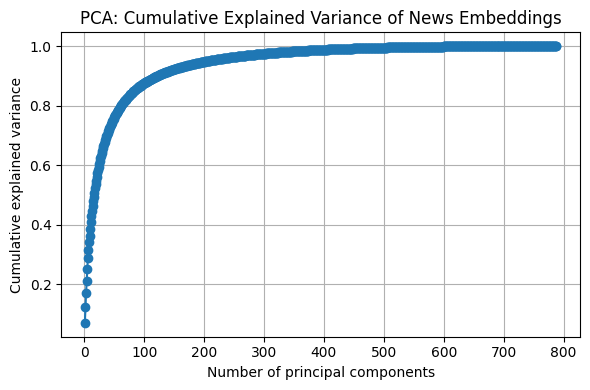

In [ ]:
pca = PCA(n_components=788)
pca.fit(X_maxmean)
explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(cumulative)+1), cumulative, marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA: Cumulative Explained Variance of News Embeddings")
plt.grid(True)
plt.tight_layout()
plt.show()

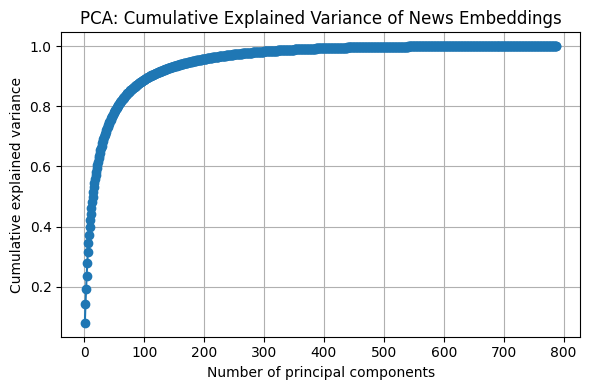

In [ ]:
pca = PCA(n_components=788)
pca.fit(X_pseudo)
explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)

plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(cumulative)+1), cumulative, marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA: Cumulative Explained Variance of News Embeddings")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
pca = PCA(n_components=100, random_state=42)
X_mean_pca = pca.fit_transform(X_mean)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_mean_pca, y_vec,
    test_size=0.2,
    random_state=42)

logit = LogisticRegression(max_iter=1000, random_state=42)
logit.fit(X_train_pca, y_train)

y_pred = logit.predict(X_test_pca)

acc      = accuracy_score(y_test, y_pred)
micro_f1 = f1_score(y_test, y_pred, average="micro")
macro_f1 = f1_score(y_test, y_pred, average="macro")
w_f1     = f1_score(y_test, y_pred, average="weighted")
mac_rec  = recall_score(y_test, y_pred, average="macro")

print(f"Accuracy:         {acc:.4f}")
print(f"Micro F1:         {micro_f1:.4f}")
print(f"Macro F1:         {macro_f1:.4f}")
print(f"Weighted F1:      {w_f1:.4f}")
print(f"Macro Recall:     {mac_rec:.4f}")


Accuracy:         0.5823
Micro F1:         0.5823
Macro F1:         0.5620
Weighted F1:      0.5763
Macro Recall:     0.5626


In [ ]:
pca_max = PCA(n_components=100, random_state=42)
X_max_pca = pca_max.fit_transform(X_max)

X_train_max, X_test_max, y_train, y_test = train_test_split(
    X_max_pca, y_vec,
    test_size=0.2,
    random_state=42)

logit_max = LogisticRegression(max_iter=1000, random_state=42)
logit_max.fit(X_train_max, y_train)

y_pred_max = logit_max.predict(X_test_max)

acc_max      = accuracy_score(y_test, y_pred_max)
micro_f1_max = f1_score(y_test, y_pred_max, average="micro")
macro_f1_max = f1_score(y_test, y_pred_max, average="macro")
w_f1_max     = f1_score(y_test, y_pred_max, average="weighted")
mac_rec_max  = recall_score(y_test, y_pred_max, average="macro")

print(f"Accuracy:         {acc_max:.4f}")
print(f"Micro F1:         {micro_f1_max:.4f}")
print(f"Macro F1:         {macro_f1_max:.4f}")
print(f"Weighted F1:      {w_f1_max:.4f}")
print(f"Macro Recall:     {mac_rec_max:.4f}")

Accuracy:         0.6076
Micro F1:         0.6076
Macro F1:         0.5835
Weighted F1:      0.5987
Macro Recall:     0.5845


In [ ]:
pca_maxmean = PCA(n_components=100, random_state=42)
X_maxmean_pca = pca_maxmean.fit_transform(X_maxmean)
X_train_maxmean, X_test_maxmean, y_train, y_test = train_test_split(
    X_maxmean_pca, y_vec,
    test_size=0.2,
    random_state=42)


logit_maxmean = LogisticRegression(max_iter=1000, random_state=42)
logit_maxmean.fit(X_train_maxmean, y_train)

y_pred_maxmean = logit_maxmean.predict(X_test_maxmean)

acc_maxmean      = accuracy_score(y_test, y_pred_maxmean)
micro_f1_maxmean = f1_score(y_test, y_pred_maxmean, average="micro")
macro_f1_maxmean = f1_score(y_test, y_pred_maxmean, average="macro")
w_f1_maxmean     = f1_score(y_test, y_pred_maxmean, average="weighted")
mac_rec_maxmean  = recall_score(y_test, y_pred_maxmean, average="macro")

print(f"Accuracy:         {acc_maxmean:.4f}")
print(f"Micro F1:         {micro_f1_maxmean:.4f}")
print(f"Macro F1:         {macro_f1_maxmean:.4f}")
print(f"Weighted F1:      {w_f1_maxmean:.4f}")
print(f"Macro Recall:     {mac_rec_maxmean:.4f}")

Accuracy:         0.5696
Micro F1:         0.5696
Macro F1:         0.5461
Weighted F1:      0.5618
Macro Recall:     0.5476


In [ ]:

pca_pseudo = PCA(n_components=100, random_state=42)
X_pseudo_pca = pca_pseudo.fit_transform(X_pseudo)

X_train_pseudo, X_test_pseudo, y_train, y_test = train_test_split(
    X_pseudo_pca, y_vec,
    test_size=0.2,
    random_state=42)

logit_pseudo = LogisticRegression(max_iter=1000, random_state=42)
logit_pseudo.fit(X_train_pseudo, y_train)

y_pred_pseudo = logit_pseudo.predict(X_test_pseudo)

acc_pseudo      = accuracy_score(y_test, y_pred_pseudo)
micro_f1_pseudo = f1_score(y_test, y_pred_pseudo, average="micro")
macro_f1_pseudo = f1_score(y_test, y_pred_pseudo, average="macro")
w_f1_pseudo     = f1_score(y_test, y_pred_pseudo, average="weighted")
mac_rec_pseudo  = recall_score(y_test, y_pred_pseudo, average="macro")
print(f"Accuracy:         {acc_pseudo:.4f}")
print(f"Micro F1:         {micro_f1_pseudo:.4f}")
print(f"Macro F1:         {macro_f1_pseudo:.4f}")
print(f"Weighted F1:      {w_f1_pseudo:.4f}")
print(f"Macro Recall:     {mac_rec_pseudo:.4f}")


Accuracy:         0.6013
Micro F1:         0.6013
Macro F1:         0.5725
Weighted F1:      0.5893
Macro Recall:     0.5751


In the next part, I will use paraphrase-MiniLM-L6-v2 to construct the embeddings, and use such embeddings to classify the stock price movements

In [ ]:
backbone     = "sentence-transformers/paraphrase-MiniLM-L6-v2"
transformer  = Transformer(backbone, max_seq_length=128)
dim          = transformer.get_word_embedding_dimension()

mean_pool    = Pooling(dim, pooling_mode_mean_tokens=True)
max_pool     = Pooling(dim, pooling_mode_mean_tokens=False, pooling_mode_max_tokens=True)
maxmean_pool = Pooling(dim, pooling_mode_mean_tokens=True,  pooling_mode_max_tokens=True)
pseudo_pool  = Pooling(dim, pooling_mode_mean_tokens=False, pooling_mode_max_tokens=False,
                       pooling_mode_cls_token=True)

model_mean    = SentenceTransformer(modules=[transformer, mean_pool],    device="cuda")
model_max     = SentenceTransformer(modules=[transformer, max_pool],     device="cuda")
model_maxmean = SentenceTransformer(modules=[transformer, maxmean_pool], device="cuda")
model_pseudo  = SentenceTransformer(modules=[transformer, pseudo_pool],  device="cuda")

variants = {
    "mean":    model_mean,
    "max":     model_max,
    "maxmean": model_maxmean,
    "pseudo":  model_pseudo,
}

buffers = {name: [] for name in variants}

for sym, df in company_dfs.items():
    if "attributes.publishOn" in df.columns:
        df = df.rename(columns={"attributes.publishOn": "publishOn"})

    texts = df["title"].fillna("").tolist()

    for name, model in variants.items():
        emb = model.encode(texts, batch_size=32, convert_to_numpy=True)
        print(f"{name:7s} → {emb.shape[0]} samples × {emb.shape[1]}-dim embeddings")
        df[f"emb_{name}"] = list(emb)


        buffers[name].append(df.assign(symbol=sym))

X_store = {}

for name, parts in buffers.items():
    big_df = pd.concat(parts, ignore_index=True)
    X = np.vstack(big_df[f"emb_{name}"].values)
    X_store[name + "_1"] = X
    globals()[f"X_{name}_1"] = X

    print(f"{name:7s} → X_{name}_1.shape = {X.shape}")

mean    → 200 samples × 384-dim embeddings
max     → 200 samples × 384-dim embeddings
maxmean → 200 samples × 768-dim embeddings
pseudo  → 200 samples × 384-dim embeddings
mean    → 200 samples × 384-dim embeddings
max     → 200 samples × 384-dim embeddings
maxmean → 200 samples × 768-dim embeddings
pseudo  → 200 samples × 384-dim embeddings
mean    → 200 samples × 384-dim embeddings
max     → 200 samples × 384-dim embeddings
maxmean → 200 samples × 768-dim embeddings
pseudo  → 200 samples × 384-dim embeddings
mean    → 200 samples × 384-dim embeddings
max     → 200 samples × 384-dim embeddings
maxmean → 200 samples × 768-dim embeddings
pseudo  → 200 samples × 384-dim embeddings
mean    → X_mean_1.shape = (800, 384)
max     → X_max_1.shape = (800, 384)
maxmean → X_maxmean_1.shape = (800, 768)
pseudo  → X_pseudo_1.shape = (800, 384)


In [ ]:
# assume remove the embeddings without y labels.

variants = {
    "mean":    model_mean,
    "max":     model_max,
    "maxmean": model_maxmean,
    "pseudo":  model_pseudo,
}

buffers1 = {name: [] for name in variants}

for sym, df in labeled_dfs.items():
    texts = df["title"].fillna("").tolist()
    for name, model in variants.items():
        emb = model.encode(texts, batch_size=32, convert_to_numpy=True)
        df1 = df.copy()
        df1[f"emb_{name}_1"] = list(emb)
        buffers1[name].append(df1.assign(symbol=sym))


X_store_1 = {}
y_vec_1   = None

for name, parts in buffers1.items():
    big_df = pd.concat(parts, ignore_index=True)
    X1 = np.vstack(big_df[f"emb_{name}_1"].values)

    X_store_1[name + "_1"] = X1
    globals()[f"X_{name}_1"] = X1

    if y_vec_1 is None:
        y_vec_1 = big_df["label"].astype(int).values

    print(f"{name:7s}_1 → X_{name}_1.shape = {X1.shape}")

for name in variants:
    assert X_store_1[name + "_1"].shape[0] == len(y_vec_1)



mean   _1 → X_mean_1.shape = (788, 384)
max    _1 → X_max_1.shape = (788, 384)
maxmean_1 → X_maxmean_1.shape = (788, 768)
pseudo _1 → X_pseudo_1.shape = (788, 384)
✅ All X_*_1 and y_vec_1 are aligned


In [ ]:
pca_mean_1 = PCA(n_components=100, random_state=42)
X_mean_1_pca = pca_mean_1.fit_transform(X_mean_1)

X_train_mean_1, X_test_mean_1, y_train_1, y_test_1 = train_test_split(
    X_mean_1_pca, y_vec_1,
    test_size=0.2,
    random_state=42)

logit_mean_1 = LogisticRegression(max_iter=1000, random_state=42)
logit_mean_1.fit(X_train_mean_1, y_train_1)
y_pred_mean_1 = logit_mean_1.predict(X_test_mean_1)

acc_mean_1      = accuracy_score(y_test_1, y_pred_mean_1)
micro_f1_mean_1  = f1_score(y_test_1, y_pred_mean_1, average="micro")
macro_f1_mean_1  = f1_score(y_test_1, y_pred_mean_1, average="macro")
w_f1_mean_1      = f1_score(y_test_1, y_pred_mean_1, average="weighted")
mac_rec_mean_1   = recall_score(y_test_1, y_pred_mean_1, average="macro")

print(f"Accuracy:         {acc_mean_1 :.4f}")
print(f"Micro F1:         {micro_f1_mean_1 :.4f}")
print(f"Macro F1:         {macro_f1_mean_1 :.4f}")
print(f"Weighted F1:      {w_f1_mean_1 :.4f}")
print(f"Macro Recall:     {mac_rec_mean_1 :.4f}")

Accuracy:         0.6582
Micro F1:         0.6582
Macro F1:         0.6130
Weighted F1:      0.6331
Macro Recall:     0.6206


In [ ]:

pca_max_1 = PCA(n_components=100, random_state=42)
X_max_1_pca = pca_max_1.fit_transform(X_max_1)

X_train_max_1, X_test_max_1, y_train_1, y_test_1 = train_test_split(
    X_max_1_pca, y_vec_1,
    test_size=0.2,
    random_state=42)


logit_max_1 = LogisticRegression(max_iter=1000, random_state=42)
logit_max_1.fit(X_train_max_1, y_train_1)
y_pred_max_1 = logit_max_1.predict(X_test_max_1)

acc_max_1      = accuracy_score(y_test_1, y_pred_max_1)
micro_f1_max_1 = f1_score(y_test_1, y_pred_max_1, average="micro")
macro_f1_max_1 = f1_score(y_test_1, y_pred_max_1, average="macro")
w_f1_max_1     = f1_score(y_test_1, y_pred_max_1, average="weighted")
mac_rec_max_1  = recall_score(y_test_1, y_pred_max_1, average="macro")
print(f"Accuracy:         {acc_max_1:.4f}")
print(f"Micro F1:         {micro_f1_max_1:.4f}")
print(f"Macro F1:         {macro_f1_max_1:.4f}")
print(f"Weighted F1:      {w_f1_max_1:.4f}")
print(f"Macro Recall:     {mac_rec_max_1:.4f}")


Accuracy:         0.5759
Micro F1:         0.5759
Macro F1:         0.5453
Weighted F1:      0.5633
Macro Recall:     0.5492


In [ ]:

pca_maxmean_1 = PCA(n_components=100, random_state=42)
X_maxmean_1_pca = pca_maxmean_1.fit_transform(X_maxmean_1)

X_train_maxmean_1, X_test_maxmean_1 = train_test_split(
    X_maxmean_1_pca,test_size=0.2,random_state=42)

logit_maxmean_1 = LogisticRegression(max_iter=1000, random_state=42)
logit_maxmean_1.fit(X_train_maxmean_1, y_train_1)

y_pred_maxmean_1 = logit_maxmean_1.predict(X_test_maxmean_1)

acc_maxmean_1      = accuracy_score(y_test_1, y_pred_maxmean_1)
micro_f1_maxmean_1 = f1_score(y_test_1, y_pred_maxmean_1, average="micro")
macro_f1_maxmean_1 = f1_score(y_test_1, y_pred_maxmean_1, average="macro")
w_f1_maxmean_1     = f1_score(y_test_1, y_pred_maxmean_1, average="weighted")
mac_rec_maxmean_1  = recall_score(y_test_1, y_pred_maxmean_1, average="macro")

print(f"Accuracy:         {acc_maxmean_1:.4f}")
print(f"Micro F1:         {micro_f1_maxmean_1:.4f}")
print(f"Macro F1:         {macro_f1_maxmean_1:.4f}")
print(f"Weighted F1:      {w_f1_maxmean_1:.4f}")
print(f"Macro Recall:     {mac_rec_maxmean_1:.4f}")


Accuracy:         0.6456
Micro F1:         0.6456
Macro F1:         0.6186
Weighted F1:      0.6340
Macro Recall:     0.6195


In [ ]:
pca_pseudo_1 = PCA(n_components=100, random_state=42)
X_pseudo_1_pca = pca_pseudo_1.fit_transform(X_pseudo_1)

X_train_pseudo_1, X_test_pseudo_1= train_test_split(
    X_pseudo_1_pca,
    test_size=0.2,
    random_state=42)

logit_pseudo_1 = LogisticRegression(max_iter=1000, random_state=42)
logit_pseudo_1.fit(X_train_pseudo_1, y_train_1)

y_pred_pseudo_1 = logit_pseudo_1.predict(X_test_pseudo_1)

acc_pseudo_1      = accuracy_score(y_test_1, y_pred_pseudo_1)
micro_f1_pseudo_1 = f1_score(y_test_1, y_pred_pseudo_1, average="micro")
macro_f1_pseudo_1 = f1_score(y_test_1, y_pred_pseudo_1, average="macro")
w_f1_pseudo_1     = f1_score(y_test_1, y_pred_pseudo_1, average="weighted")
mac_rec_pseudo_1  = recall_score(y_test_1, y_pred_pseudo_1, average="macro")
print(f"Accuracy:         {acc_pseudo_1:.4f}")
print(f"Micro F1:         {micro_f1_pseudo_1:.4f}")
print(f"Macro F1:         {macro_f1_pseudo_1:.4f}")
print(f"Weighted F1:      {w_f1_pseudo_1:.4f}")
print(f"Macro Recall:     {mac_rec_pseudo_1:.4f}")

Accuracy:         0.6203
Micro F1:         0.6203
Macro F1:         0.5780
Weighted F1:      0.5983
Macro Recall:     0.5857


In [ ]:

!pip install --quiet gspread google-auth-oauthlib

from google.colab import auth
auth.authenticate_user()

import google.auth
import gspread
import pandas as pd

creds, _ = google.auth.default(
    scopes=["https://www.googleapis.com/auth/spreadsheets.readonly"]
)
gc = gspread.authorize(creds)


SHEET_ID = "1WtZNbGdqRiG4M17yL3gvYIlWMvUEYkpdcKc27RLbzcM"
sh       = gc.open_by_key(SHEET_ID)
ws       = sh.get_worksheet(0)

records = ws.get_all_records(head=3)
sheet = pd.DataFrame(records)


,Embedding Methods,Accuracy,Micro F1,Macro F1,Weighted F1,Macro recall
0,Mean embedding,0.5823,0.5823,0.562,0.5763,0.5626
1,Max embedding,0.6076,0.6076,0.5835,0.5987,0.5845
2,Max mean Concatenation,0.5696,0.5696,0.5461,0.5618,0.5476
3,Pseudo embedding,0.6013,0.6013,0.5725,0.5893,0.5751
4,,,,,,


In [ ]:
sheet

,Embedding Methods,Accuracy,Micro F1,Macro F1,Weighted F1,Macro recall
0,Mean embedding,0.5823,0.5823,0.562,0.5763,0.5626
1,Max embedding,0.6076,0.6076,0.5835,0.5987,0.5845
2,Max mean Concatenation,0.5696,0.5696,0.5461,0.5618,0.5476
3,Pseudo embedding,0.6013,0.6013,0.5725,0.5893,0.5751
4,,,,,,
5,,,,,,
6,,,,,,
7,,,,,,
8,paraphrase-MiniLM-L6-v2,,,,,
9,Embedding Methods,Accuracy,Micro F1,Macro F1,Weighted F1,Macro recall
